# A predictive model for forecasting demand and supply information of TOP crops - Compsoft Technologies

Built a python application that analyses the top crops at any given time, depending on the season or demand. You can use the dataset available on the Internet to use.

## Catalog Info
### District-wise, season-wise crop production statistics
The data refers to district wise, crop wise, season wise and year wise data on crop covered area (Hectare) and production (Tonnes). The data is being used to study and analyse crop production, production contribution to district/State/country, Agro-climatic zone wise performance, and high yield production order for crops, crop growing pattern...

Website: https://data.gov.in/resource/district-wise-season-wise-crop-production-statistics-1997


## Data Preprocessing

In [1]:
# download dataset

!wget https://raw.githubusercontent.com/varsha815/Crop_Prediction/master/Crop_Prediction-main/apy.csv

--2022-09-22 15:42:02--  https://raw.githubusercontent.com/varsha815/Crop_Prediction/master/Crop_Prediction-main/apy.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15070649 (14M) [text/plain]
Saving to: ‘apy.csv’

apy.csv             100%[===================>]  14.37M  --.-KB/s    in 0.1s    

2022-09-22 15:42:02 (125 MB/s) - ‘apy.csv’ saved [15070649/15070649]



In [2]:
# load dataset

import pandas as pd

df = pd.read_csv('apy.csv')
print(df.head())

                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  


In [3]:
# clean dataset

df.drop(df[df['Crop_Year'] == 1997].index, inplace = True)
df.drop(df[df['Crop_Year'] == 2015].index, inplace = True)
print(df)
df.to_csv('cleaned.csv')

                         State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
...                             ...           ...        ...          ...   
246086                  West Bengal       PURULIA       2014  Summer        
246087                  West Bengal       PURULIA       2014  Summer        
246088                  West Bengal       PURULIA       2014  Whole Year    
246089                  West Bengal       PURULIA       2014  Winter        
246090                  West Bengal       PURULIA       2014  Winter        

                       Crop      Area  Production  
0                  Arec

## Data Visualization

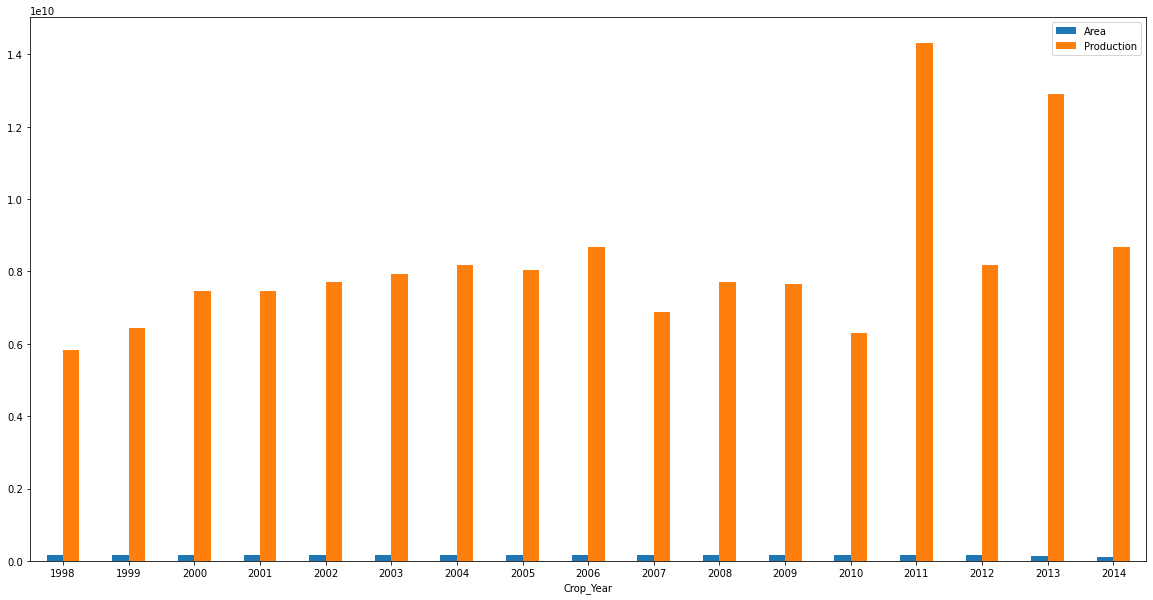

In [4]:
# production by year

production_year = df.groupby(['Crop_Year']).sum()
ax = production_year.plot.bar(rot=0, figsize=(20, 10))

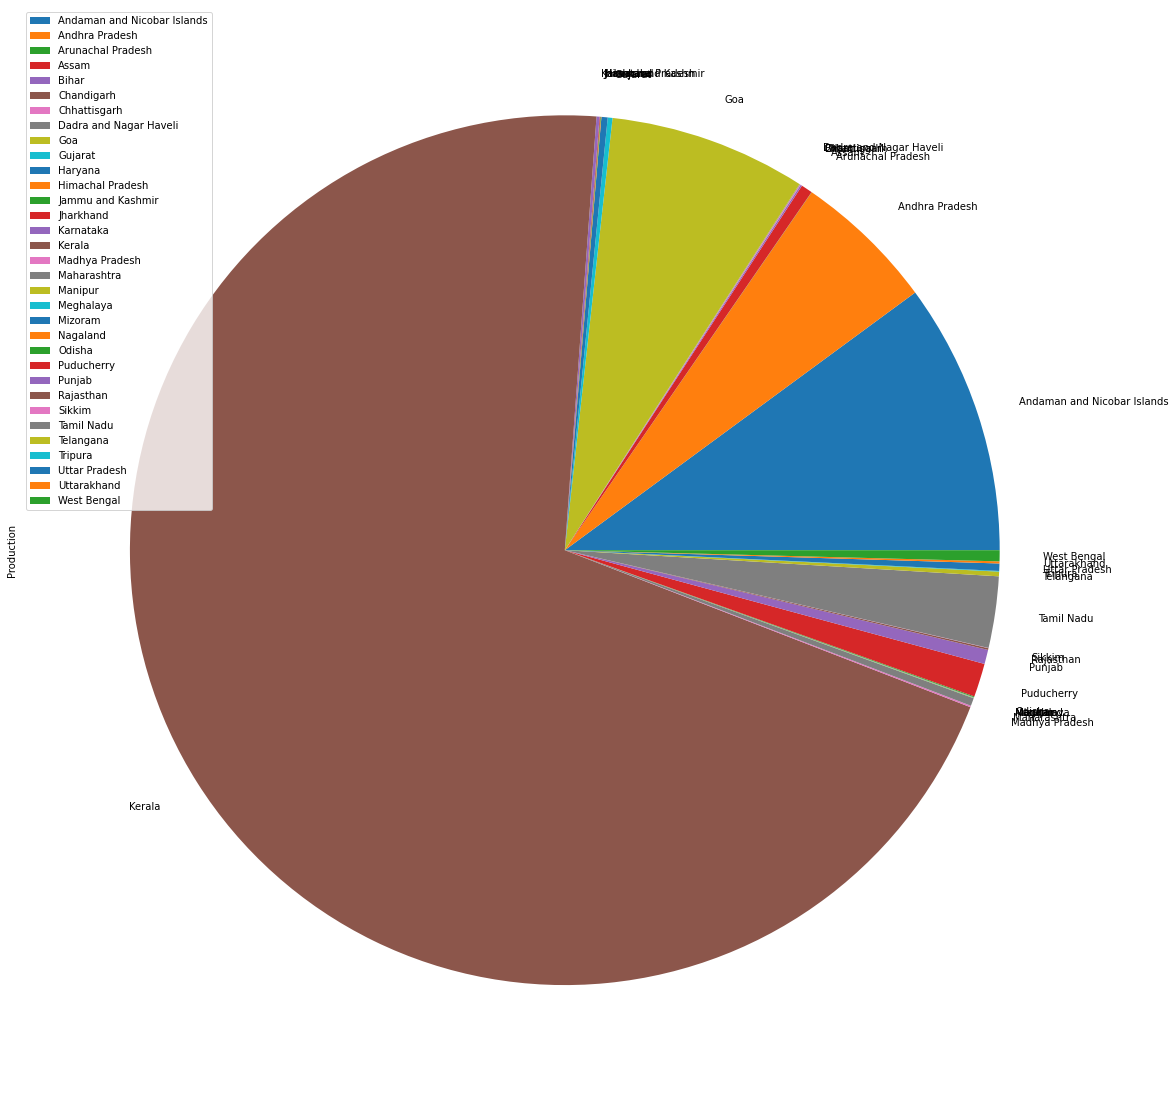

In [5]:
# production by state

production_state_year = df.groupby(['State_Name']).mean()
production_state = production_state_year.drop(columns = 'Crop_Year')

ax = production_state_year.plot.pie(y='Production', figsize=(50, 20))

## Data Grouping

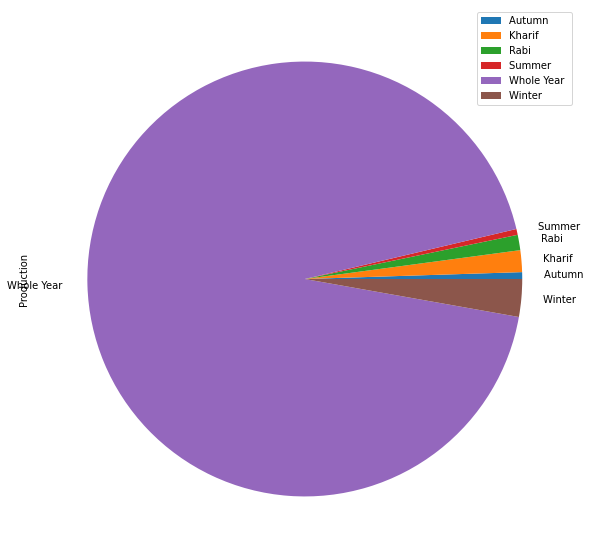

In [6]:
# production by season and year

production_season_year = df.groupby(['Season']).mean()
production_season_year

ax = production_season_year.plot.pie(y='Production', figsize=(30, 10))

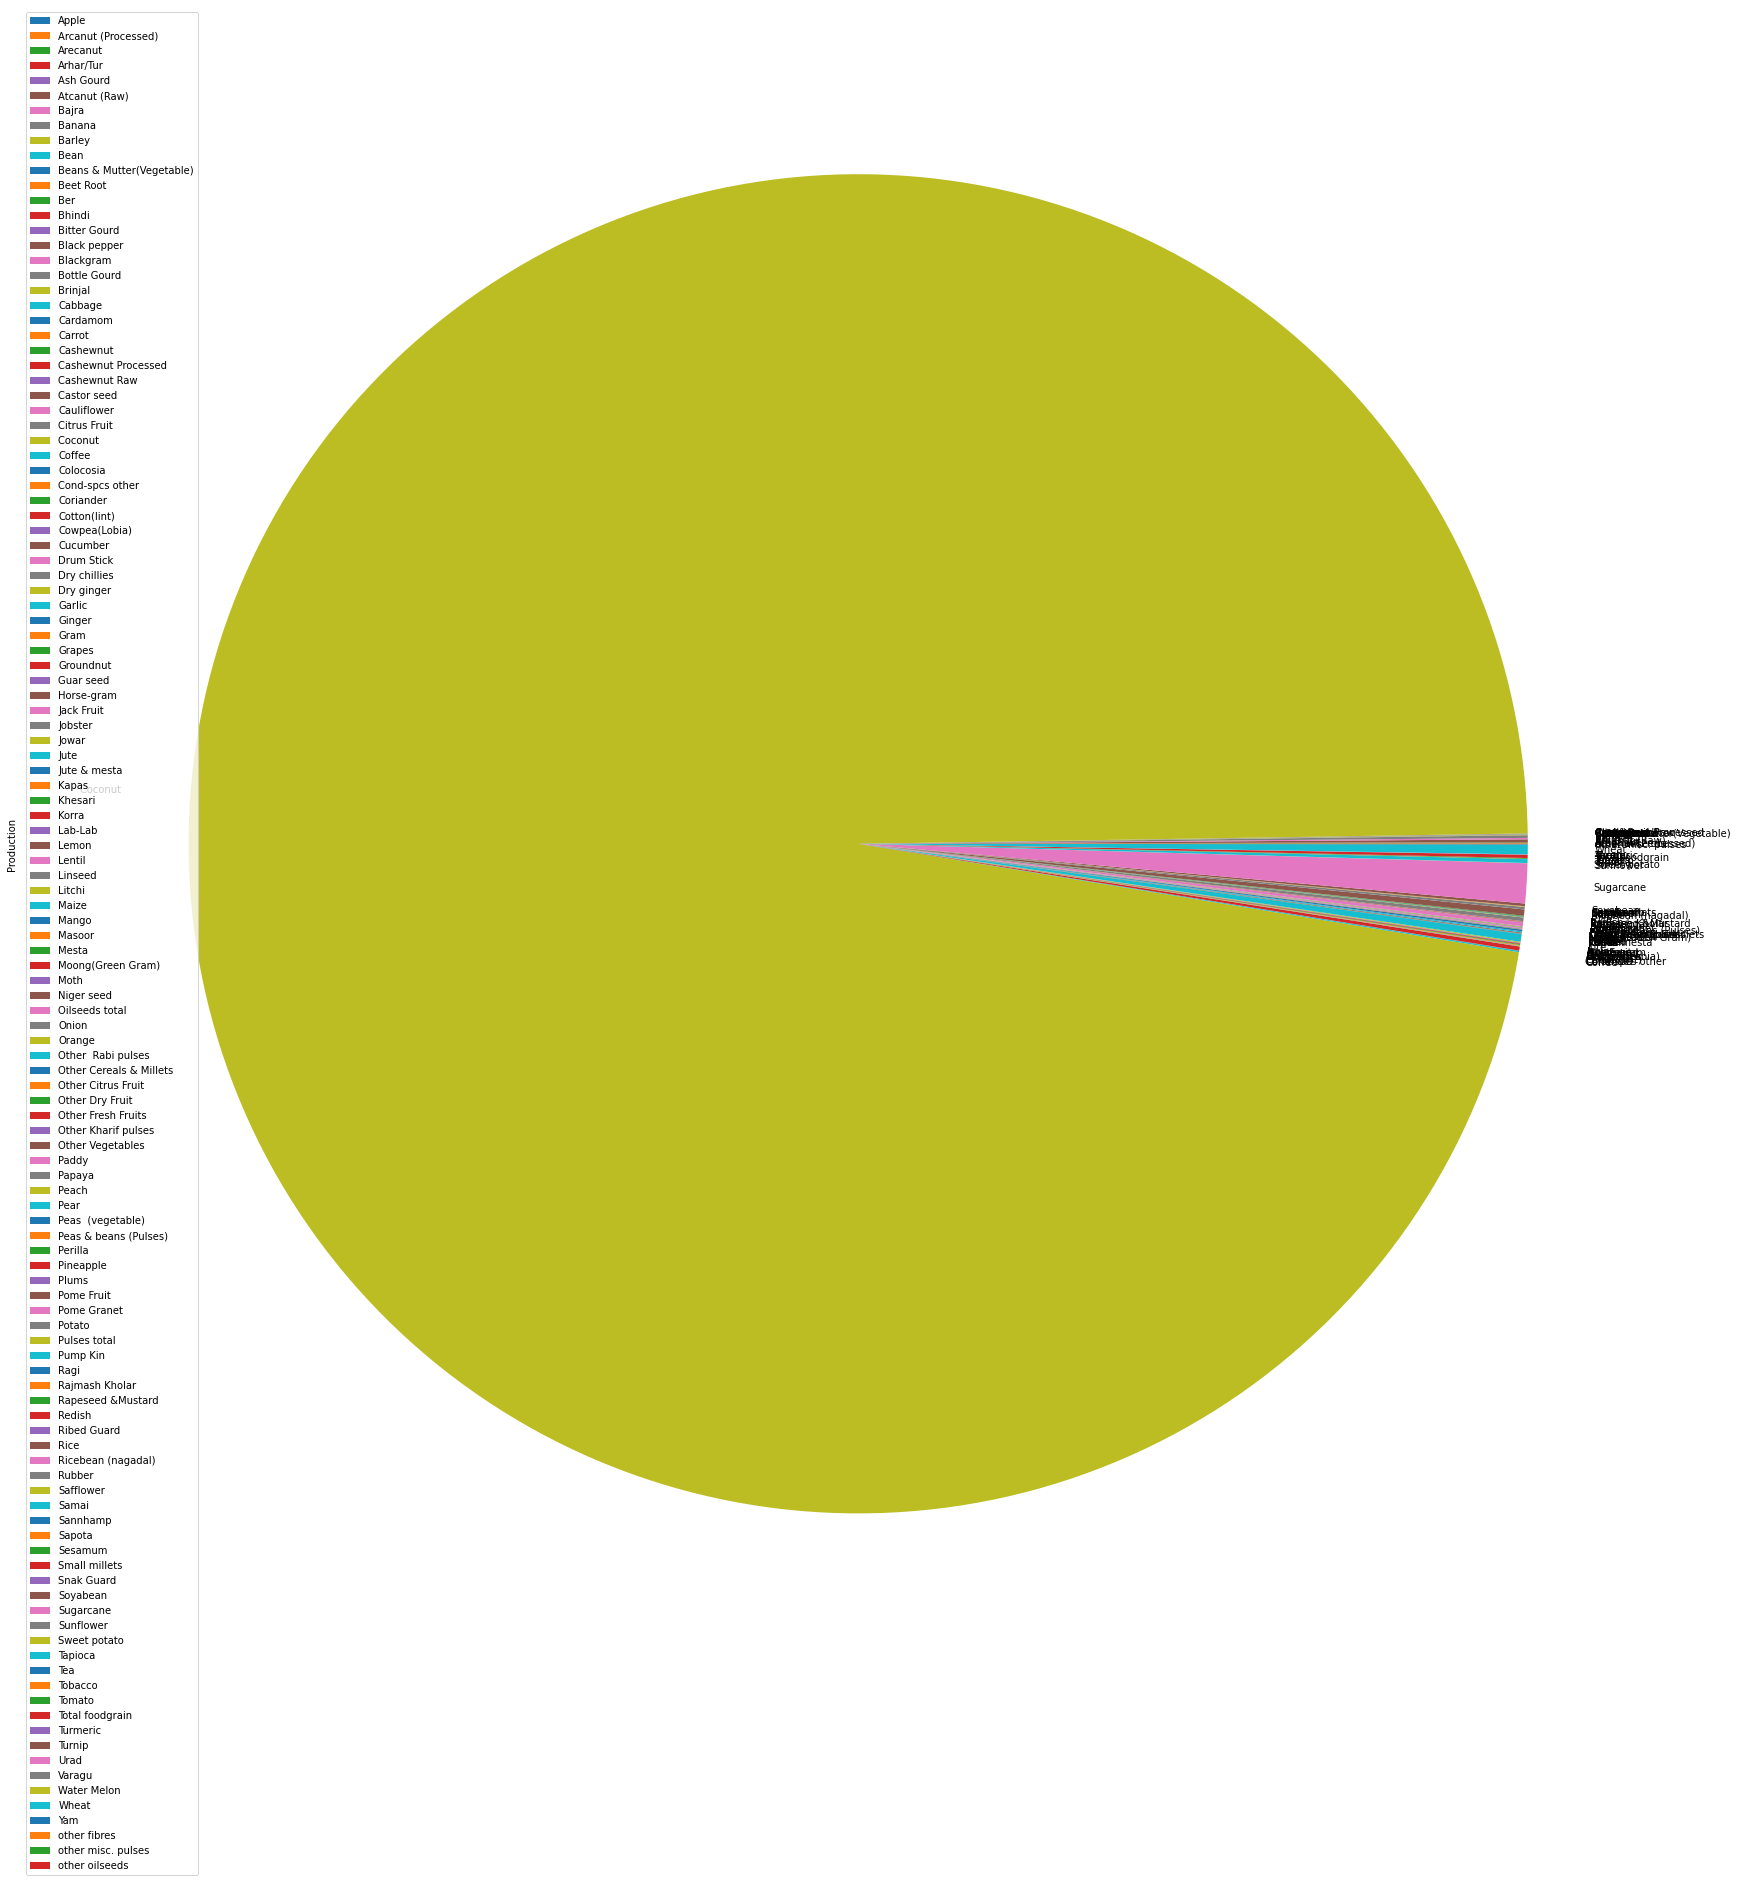

In [9]:
# production by crop and year

production_crop = df.drop(columns = 'Crop_Year')
production_crop = production_crop.groupby(['Crop']).mean()

ax = production_crop.plot.pie(y='Production', figsize=(30, 60))

In [10]:
# production conversion to numeric type

df['Production'] = pd.to_numeric(df['Production'], errors='coerce')
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [11]:
# grouping area and production

year_area_production = df.groupby(['Crop_Year'])['Area','Production'].mean()
year_area_production = year_area_production.reset_index(level=0, inplace=False)
year_area_production

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Crop_Year,Area,Production
0,1998,14479.153906,5.172545e+05
1,1999,12678.074790,5.172145e+05
2,2000,12102.612169,5.496723e+05
3,2001,12371.499489,5.616144e+05
4,2002,9463.680476,4.654666e+05
5,2003,9954.769395,4.619857e+05
6,2004,11891.933465,5.909555e+05
7,2005,11822.333236,5.949965e+05
8,2006,11913.672644,6.212016e+05
9,2007,10513.848637,4.821251e+05


In [12]:
# Area:production calculation

year_area_production['Avg_Production'] = year_area_production['Production'] / year_area_production['Area']
year_area_production

,Crop_Year,Area,Production,Avg_Production
0,1998,14479.153906,5.172545e+05,35.724086
1,1999,12678.074790,5.172145e+05,40.795984
2,2000,12102.612169,5.496723e+05,45.417661
3,2001,12371.499489,5.616144e+05,45.395827
4,2002,9463.680476,4.654666e+05,49.184519
5,2003,9954.769395,4.619857e+05,46.408482
6,2004,11891.933465,5.909555e+05,49.693814
7,2005,11822.333236,5.949965e+05,50.328177
8,2006,11913.672644,6.212016e+05,52.141903
9,2007,10513.848637,4.821251e+05,45.856191


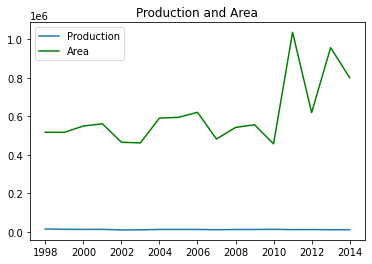

In [13]:
# comparison of production and area for each year

import matplotlib.pyplot as plt


x_axis = year_area_production.Crop_Year
y_axis = year_area_production.Area
y1_axis = year_area_production.Production

plt.plot(x_axis, y_axis)
plt.plot(x_axis, y1_axis,color='g')

plt.title("Production and Area")
plt.legend(["Production", "Area"])
plt.rcParams['figure.figsize'] = [20, 10]

plt.show()

## Using machine learning models to predict the values

### Random Forest Regression

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# splitting and model fitting
x = year_area_production.iloc[:,0:1].values # crop_year
y = year_area_production.iloc[:,3].values # avg_production

regressor = RandomForestRegressor()

regressor.fit(x,y)

RandomForestRegressor()

In [15]:
# predicting for the test values

y_pred = regressor.predict(x)
y_pred

array([37.81761041, 39.99852633, 43.45208023, 46.03594125, 48.288415  ,
       47.452323  , 48.96492811, 50.15611641, 51.12396566, 47.64077966,
       46.07921689, 45.96599137, 43.51588064, 78.27982533, 65.33032132,
       82.60541305, 79.19071271])

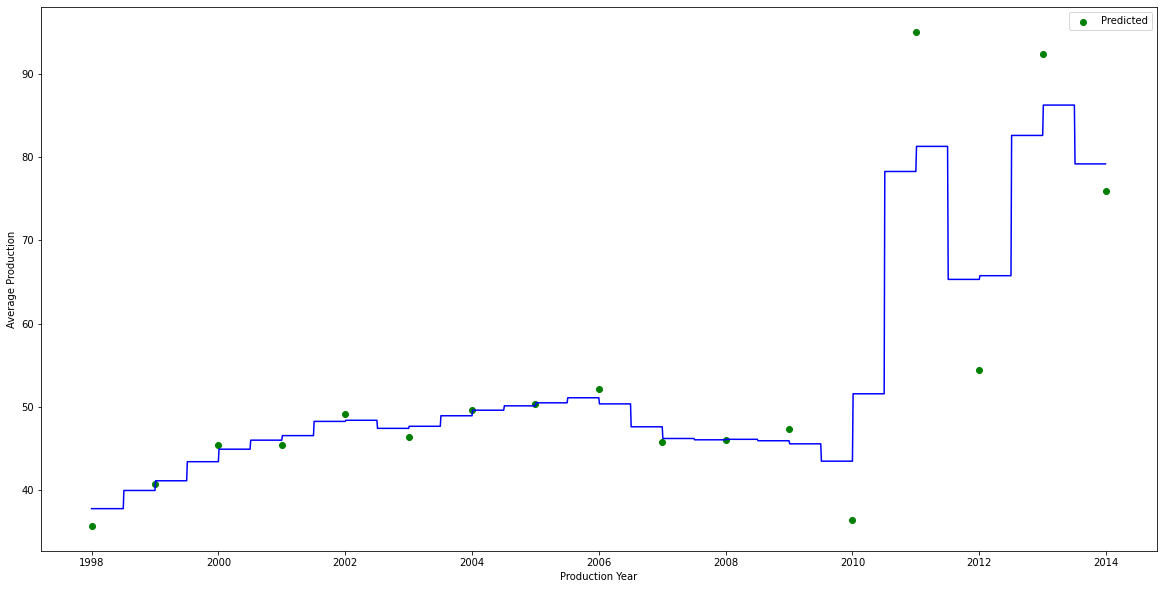

In [16]:
# actual vs predicted values

import numpy as np

x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape(len(x_grid),1)
plt.scatter(x,y,color='g')
plt.xlabel("Production Year")
plt.ylabel("Average Production")
plt.legend(["Predicted"])
plt.plot(x_grid, regressor.predict(x_grid), color='b')
plt.show()

In [ ]:
regressor.predict([[2005]])

array([50.14253554])